## Breast Cancer Diagnosis by Machine Learning (Project)
miss. Aishwarya Prakash Dhalagade

Machine Learning Research Intern Dec 2020

Pianalytix

email. id - dhalagadea3012@gmail.com

#### Breast cancer diagnosis classification project based on EDA (exploratory data analysis) and different machine learning classification algorithm for finding the best classifier fit in order to dignosis and classify the Benign (noncancerous) and Malignant (cancerous) type of breast cancer 

### Loading libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
data = pd.read_csv('data.csv')

### Seperate Target from features

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
y = data.diagnosis                                # Target or label
drop_col = ['Unnamed: 32','id', 'diagnosis']
x = data.drop(drop_col, axis=1)                   # features           
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x.shape

(569, 30)

### Plot diagnosis distribution

number of Belign tumor 357
number of Melignant tumor 212


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


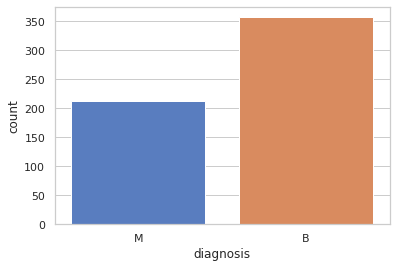

In [ ]:
ax = sns.countplot(y, label = 'counts')
B, M = y.value_counts()
print('number of Belign tumor', B)
print('number of Melignant tumor', M)

In [ ]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualize standardised data with Seaborn

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

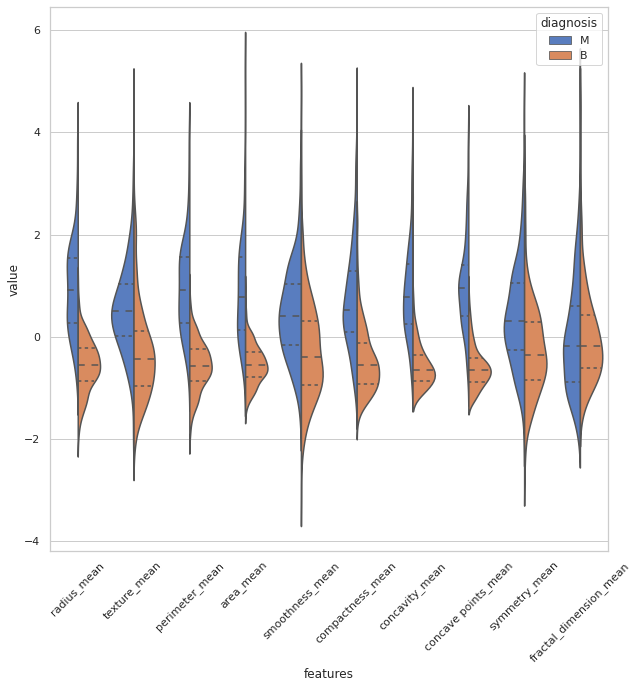

In [ ]:
# Take first 10 features

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:,0:10]],axis= 1)                # take first 10 features to make 1 group of viloinplot of features
data = pd.melt(data, id_vars = 'diagnosis',
               var_name='features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x= 'features', y='value',hue='diagnosis',data = data, split= True, inner='quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

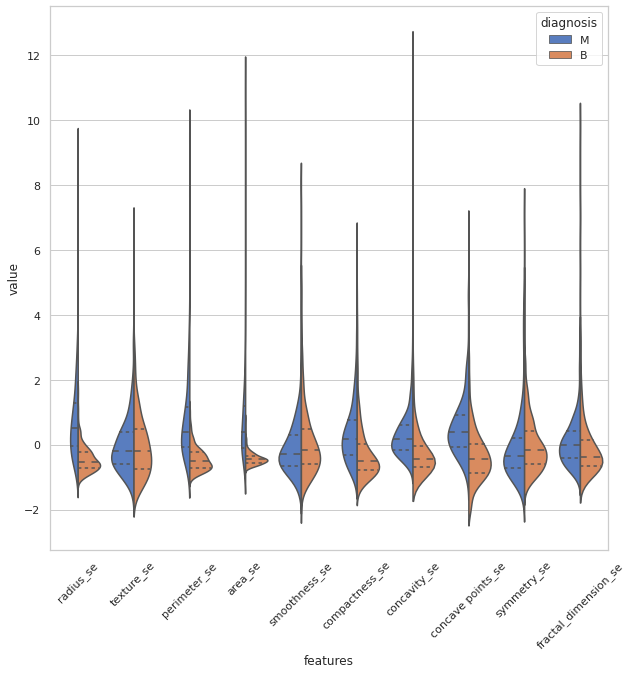

In [ ]:
# Take next 10 features

data = pd.concat([y ,data_std.iloc[:,10:20]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis',
               var_name = 'features', 
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x = 'features', y = 'value', data = data, hue = 'diagnosis', split = True, inner = 'quart')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

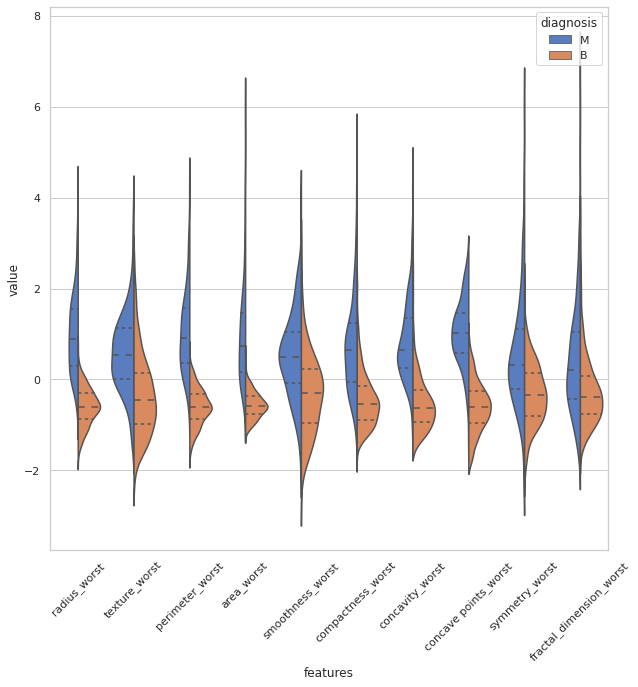

In [ ]:
# Take last 10 features

data = pd.concat([y ,data_std.iloc[:,20:30]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis',
               var_name = 'features', 
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x = 'features', y = 'value', data = data, hue = 'diagnosis', split = True, inner = 'quart')
plt.xticks(rotation = 45)

### Using Joint plots for feature comparison

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


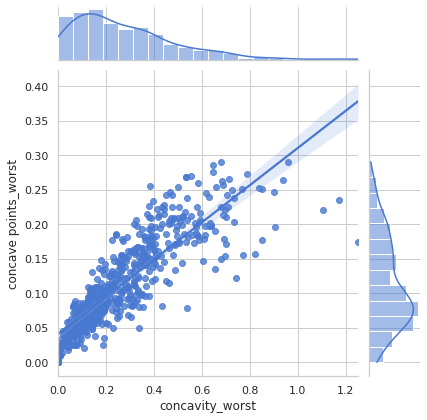

In [ ]:
# As from the viloin plot concavity_worst and concave points_worst are seems to be somewhat identical

sns.jointplot(x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'],
              kind = 'reg')

# this shows that both the features has high value of correlation between them
# as scattering is very much close

### Obsorving the distribution of the values and their varience with Swarm plots

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

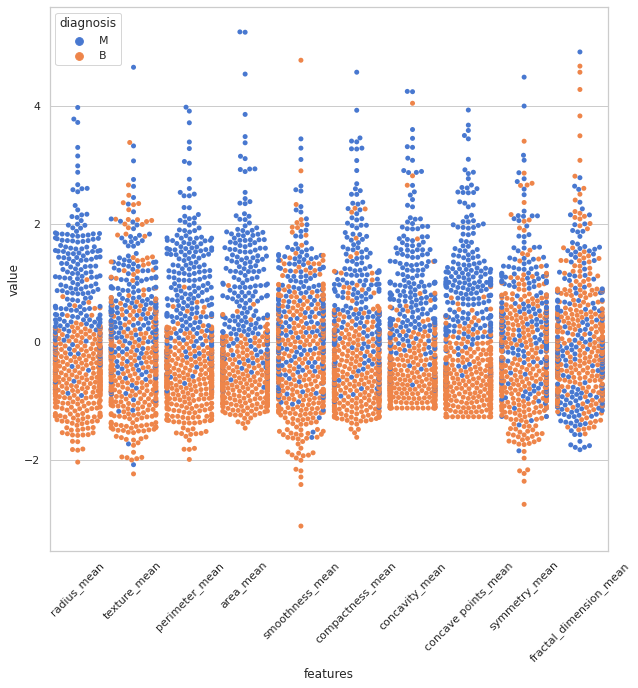

In [ ]:
# Swarm plots
# Take fisrt 10 features

sns.set(style = 'whitegrid', palette= 'muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x = 'features', y = 'value', data = data, hue = 'diagnosis')
plt.xticks(rotation = 45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

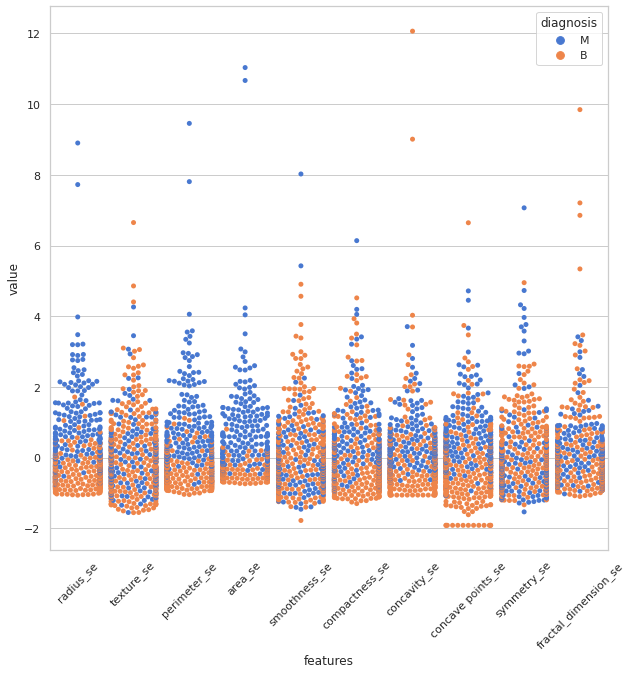

In [ ]:
# Take next 10 features

sns.set(style = 'whitegrid', palette= 'muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x = 'features', y = 'value', data = data, hue = 'diagnosis')
plt.xticks(rotation = 45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

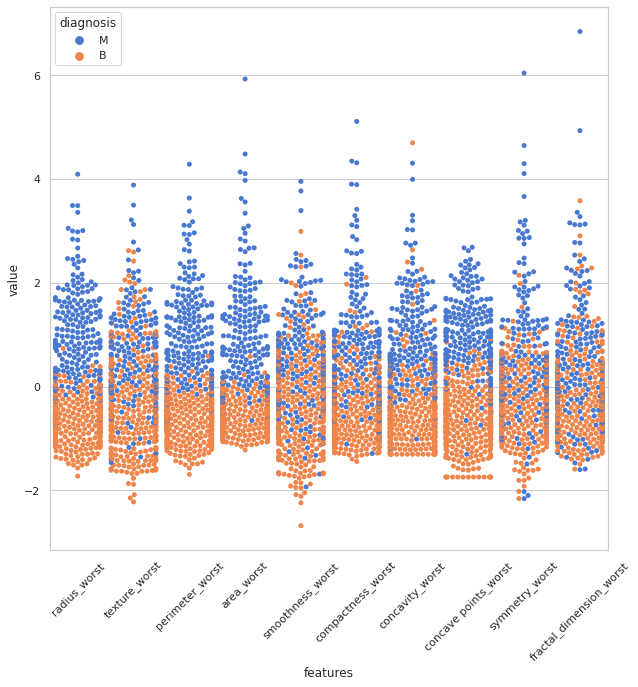

In [ ]:
# Take last 10 features

sns.set(style = 'whitegrid', palette= 'muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 20:30]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x = 'features', y = 'value', data = data, hue = 'diagnosis')
plt.xticks(rotation = 45)

### Observing all pairwise correlation

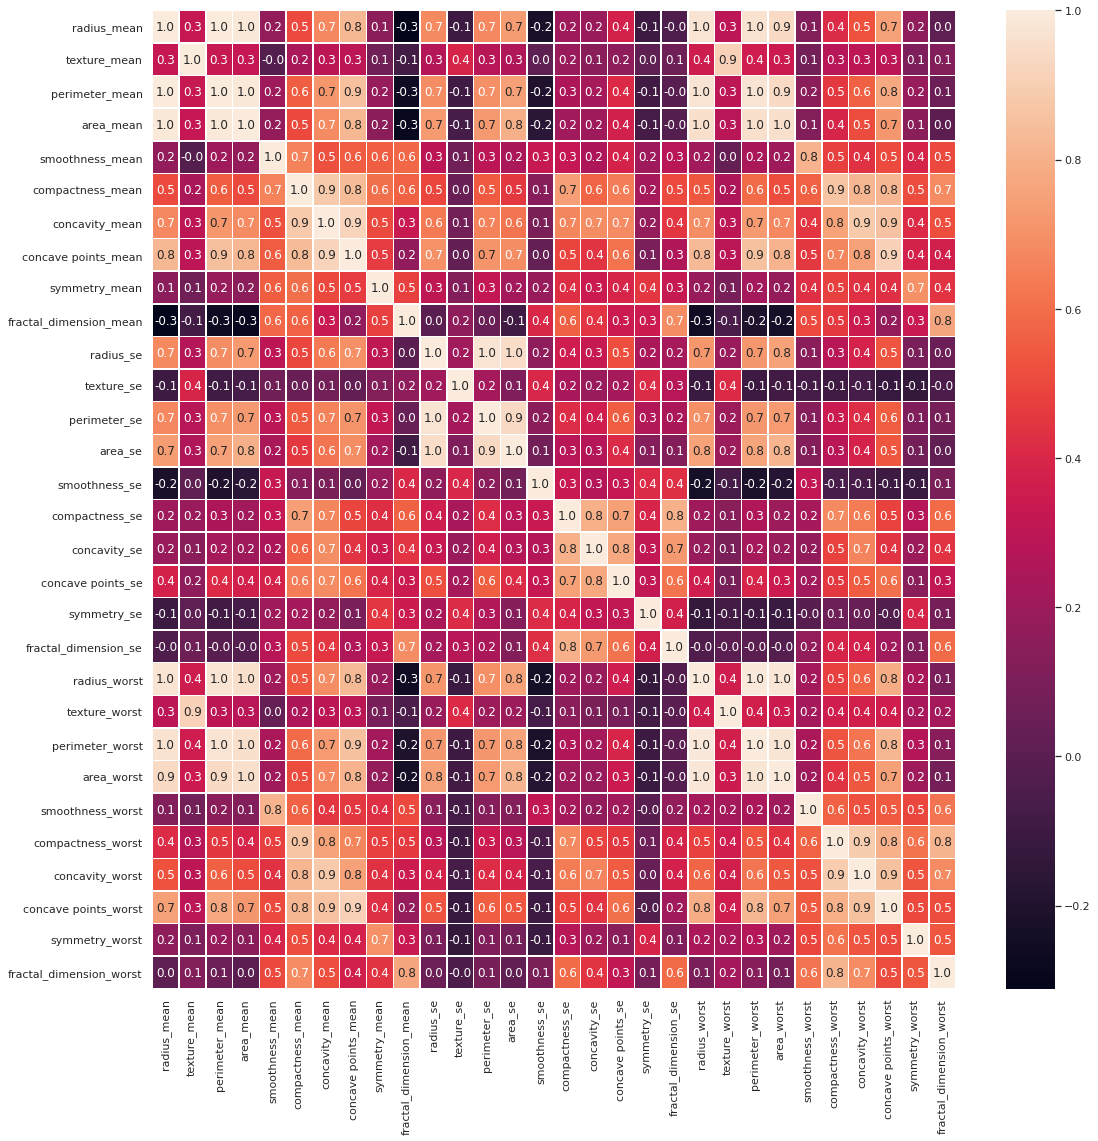

In [ ]:
a, ax = plt.subplots(figsize = (18,18))
sns.heatmap(x.corr(), annot= True, fmt= '.1f', linewidths= 0.5, ax = ax)
# these heatmap shows the relation between the correlation of each of the features with each another by heatmap

### Droping correlated columns from the feature list

In [ ]:
drop_cols = ['perimeter_mean', 'radius_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 
             'radius_worst', 'perimeter_worst','compactness_worst', 'concave points_worst', 'compactness_se',
             'concave points_se','texture_worst','area_worst']
df = x.drop(drop_cols, axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [ ]:
df.shape

(569, 16)

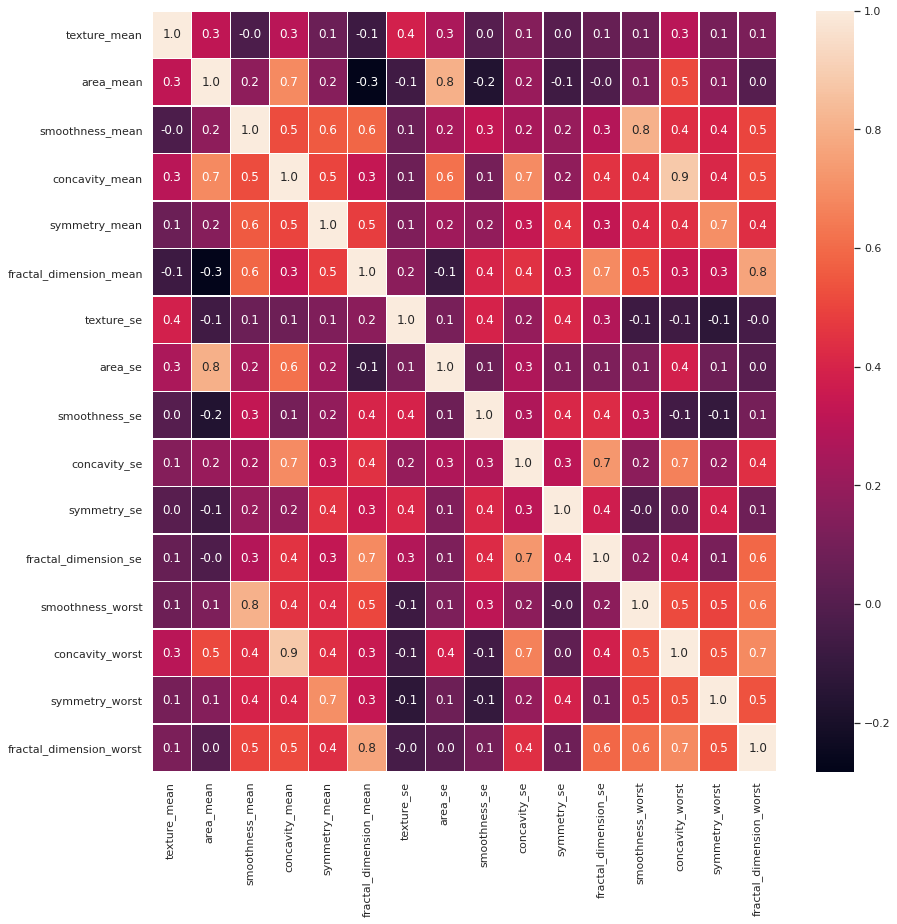

In [ ]:
f, ax = plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(), annot=True, fmt = '.1f', linewidths=0.5, ax = ax)

# Feature Selection Techniques to get the prediction and highest accuracy

### Feature extraction using principle componant analysis(PCA)

In [ ]:
## get the original feature and label set then spilt again newly

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state = 42)

x_train_norm = (x_train - x_train.mean())/ (x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.mean())/ (x_test.max() - x_test.min())

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_train_norm.shape

(398, 30)

Text(0, 0.5, 'Cummualtive explained varience')

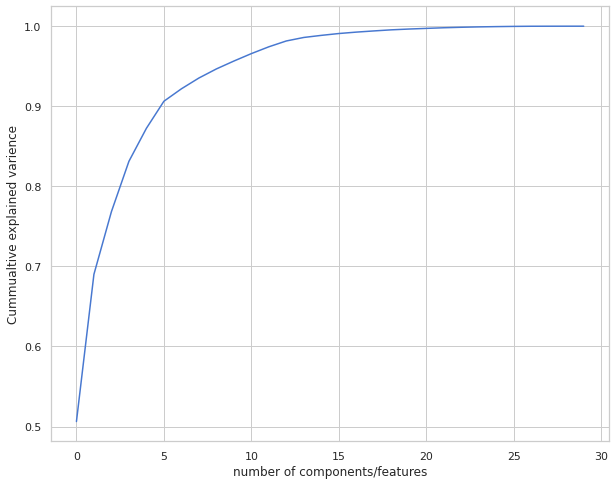

In [ ]:

# here we gonna see the commulative sum varience ratio vs number of feeatures we gonna take to get that much percent of ratio/accuarcy

plt.figure(1, figsize=(10,8))
sns.lineplot(data = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components/features')
plt.ylabel('Cummualtive explained varience')

# these shows that to get around 99% of accuaracy we have to take around 16-17 features for prediction

## 1) XGBoost Classifier

### 1_classification using XGBoost (minimal feature selection)

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 42)

clf_1 = XGBClassifier(random_state=42)
clf_1 = clf_1.fit(x_train, y_train)

accuracy is :  0.9766081871345029


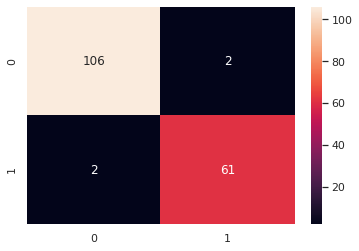

In [ ]:
y_pred_1 = clf_1.predict(x_test)
print('accuracy is : ', accuracy_score(y_test, y_pred_1)) 
cm = confusion_matrix(y_test, y_pred_1)
sns.heatmap(cm, annot= True, fmt = 'd')

### 2_Univariate feature selection and XGBoost

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
select_feature = SelectKBest(chi2, k =10).fit(x_train, y_train)

print('score list: ', select_feature.scores_)
print('feature list: ', x_train.columns)

score list:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
feature list:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [ ]:
x_train.shape

(398, 16)

accuracy is:  0.9707602339181286


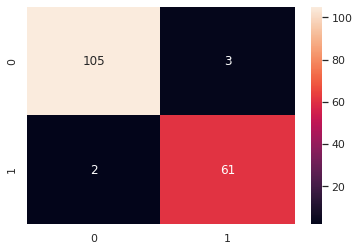

In [ ]:
# from selectkbest function we gonna select the features of top 10 values/scores of k

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_2 = XGBClassifier()
clf_2.fit(x_train_2, y_train)

y_pred_2 = clf_2.predict(x_test_2)
print('accuracy is: ', accuracy_score(y_test, y_pred_2))
cm = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm, annot= True, fmt = 'd')

In [ ]:
x_train_2.shape

(398, 10)

### 3_Recursive feature elemination with cross validation

In [ ]:
from sklearn.feature_selection import RFECV

clf_3 = XGBClassifier()
rfecv = RFECV(estimator = clf_3, step = 1, cv = 5, scoring = 'accuracy', n_jobs = -1).fit(x_train, y_train)       # step = 1, means eliminate 1 feature at each step, cv = cross validation folds

print('optimal number of features: ', rfecv.n_features_)
print('best features: ', x_train.columns[rfecv.support_])

optimal number of features:  16
best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [ ]:
print('accuracy is: ', accuracy_score(y_test, rfecv.predict(x_test)))

accuracy is:  0.9766081871345029


## 2) Logistic Regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_2 = LogisticRegression(max_iter= 200)
classifier_2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy is:  0.9473684210526315


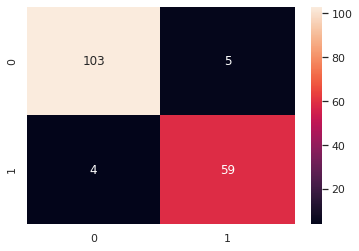

In [ ]:
y_pred_lg = classifier_2.predict(x_test)
print('accuracy is: ', accuracy_score(y_test, y_pred_lg))
cm = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(cm, annot= True, fmt = 'd')

## 3) SVM classifier

In [ ]:
from sklearn.svm import SVC
classifier_3 = SVC(kernel = 'rbf')
classifier_3.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm = classifier_3.predict(x_test)
print('accuracy is: ', accuracy_score(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot= True, fmt = 'd')

NameError: ignored

## 4) Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_4 = GaussianNB()
classifier_4.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy of model:  0.9298245614035088


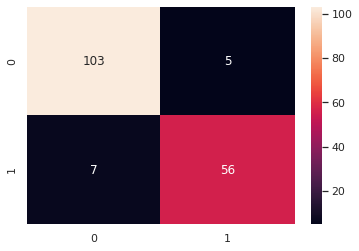

In [ ]:
y_pred_nb = classifier_4.predict(x_test)
print('Accuracy of model: ', accuracy_score(y_test,y_pred_nb))
cm = confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm, annot= True, fmt= 'd')

## 5) Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_5 = DecisionTreeClassifier(min_samples_split=2)
classifier_5.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

accuracy is:  0.9064327485380117


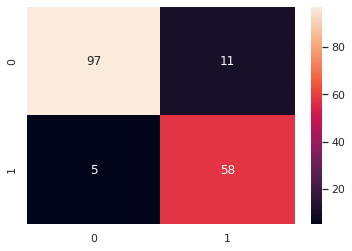

In [ ]:
y_pred_dt = classifier_5.predict(x_test)
print('accuracy is: ', accuracy_score(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot= True, fmt = 'd')

## 6) Random forest classifier

### 1_minimal feature selection - 16 features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_6 = RandomForestClassifier()
classifier_6.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy is:  0.9649122807017544


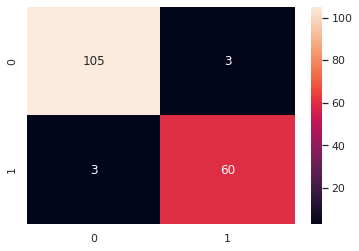

In [ ]:
y_pred_rf = classifier_6.predict(x_test)
print('accuracy is: ', accuracy_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot= True, fmt = 'd')

### 2_univariate feature selection

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# select_feature = SelectKBest(chi2, k =10).fit(x_train, y_train)

# print('score list: ', select_feature.scores_)
# print('feature list: ', x_train.columns)

# x_train_2 = select_feature.transform(x_train)
# x_test_2 = select_feature.transform(x_test)

we have allready performed above steps for selectkbest algorithm in XGBoost classifier

accuracy is:  0.9707602339181286


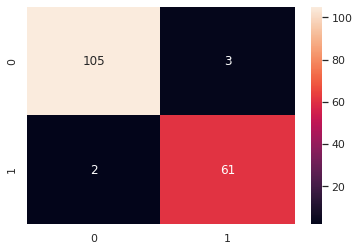

In [ ]:
# from selectkbest function we gonna select the features of top 10 values/scores of k

clf_7 = RandomForestClassifier()
clf_7.fit(x_train_2, y_train)

y_pred_rf10 = clf_2.predict(x_test_2)
print('accuracy is: ', accuracy_score(y_test, y_pred_rf10))
cm = confusion_matrix(y_test, y_pred_rf10)
sns.heatmap(cm, annot= True, fmt = 'd')